## Example 4

Consider the following nonlinear system in three unknowns:
\begin{eqnarray}
p_1 &=& x_1 x_3 - x_1^2\\
p_2 &=& x_1^2 x_2 − \sqrt{x_2} \\
0  &=& x_1^2 + x_2 - \arcsin x_3\\
\end{eqnarray}

which, upon introduction of four y variables, 



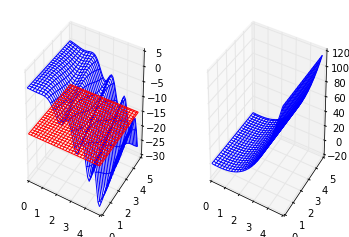

In [79]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline


x_1 = np.arange(0, 5, 0.1)
x_2 = np.arange(0, 5, 0.1)
X_1, X_2 = np.meshgrid(x_1, x_2)
Z_1 = X_1*np.sin(X_1**2+X_2)-X_1**2 
Z_2 = x_1**2*x_2-np.sqrt(x_2)


fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.plot_wireframe(X_1, X_2, Z_1*0-15, rstride=2, cstride=2, color='r')
ax1.plot_wireframe(X_1, X_2, Z_1, rstride=2, cstride=2)

ax2.plot_wireframe(X_1, X_2, Z_2, rstride=2, cstride=2)
plt.show()


\begin{eqnarray}
y_1 &=& x_1 x_3 \\
y_2 &=& x_1^2\\
y_3 &=& x_1^2 x_2 \\
y_4 &=& \sqrt{x_2} \\
y_5 &=& x_2 \\
y_6 &=& \arcsin x_3
\end{eqnarray}


\begin{eqnarray}
p_1 &=& y_1 -y_2\\
p_2 &=& y_3 - y_4 \\
0 &=& y_2 + y_5 - y_6
\end{eqnarray}

is converted into an underdetermined linear system:

$$ 
\left( 
\begin{array}{c}
 p_1 \\
 p_2 \\
 0 
\end{array}
\right)
=
\underbrace{
\left( 
\begin{array}{cc}
 1 & -1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1 & -1 & 0 & 0 \\
 0 & 1 & 0 & 0 & 1 & -1 \\
\end{array}
\right) 
}_{E}
\left( 
\begin{array}{c}
 y_1 \\
 y_2 \\
 y_3 \\
 y_4 \\
 y_5 \\
 y_6   
\end{array}
\right) 
$$ 

\begin{eqnarray}
\ln x_1  &=& \alpha_1 \\
\ln x_2  &=& \alpha_2 \\
\ln x_3  &=& \alpha_3 
\end{eqnarray}


\begin{eqnarray}
 u_1  &=& \ln y_1 =  \alpha_1 + \alpha_3 \\
 u_2  &=& \ln y_2 = 2 \alpha_1\\
 u_3  &=& \ln y_3 = 2 \alpha_1 + \alpha_2\\
 u_4  &=& \ln y_4 = 1/2 \alpha_2 \\
 u_5  &=& \ln y_5 = \alpha_2\\
 u_6  &=& \ln \left( \sin y_6 \right) = \alpha_3
\end{eqnarray}


\begin{eqnarray}
 y_1  &=& e^{u_1} \\
 y_2  &=& e^{u_2} \\
 y_3  &=& e^{u_3} \\
 y_4  &=& e^{u_4} \\
 y_5  &=& e^{u_5} \\
 y_6  &=& \arcsin \left( {e^{u^6}} \right)
\end{eqnarray}

$$\frac{\partial y_6}{\partial u_6} = \frac{e^(u_6)}{\sqrt{-e^{2 u_6} + 1}}$$

$$ 
F^{-1}
=
\left( 
\begin{array}{cccccc}
 e^{u_1} & 0 & 0 & 0 & 0 & 0 \\
 0 & e^{u_2} & 0 & 0 & 0 & 0 \\
 0 & 0 & e^{u_3} & 0 & 0 & 0 \\
 0 & 0 & 0 & e^{u_4} & 0 & 0  \\
 0 & 0 & 0 & 0 & e^{u_5} & 0 \\
 0 & 0 & 0 & 0 & 0 & \frac{e^{u_6}}{\sqrt{-e^{2 u_6} + 1}} \\
\end{array}
\right) 
$$

In [3]:
import numpy as np

log(x_1) + log(x_3)
2*log(x_1)
2*log(x_1) + log(x_2)
log(x_2)/2
log(x_2)
log(asin(x_3))

In [370]:
E = np.array([[1, -1, 0, 0, 0, 0],
              [0,  0, 1,-1, 0, 0],
              [0,  1, 0, 0, 1,-1]
             ]) 

C = np.array([[1,  0,1],
              [2,  0,0],
              [2,  1,0],
              [0,1/2,0],
              [0,  1,0],
              [0,  0,1],
             ]) 


offset = 0.0*np.pi

def f(y):
    
    y_1 = y[0,0]
    y_2 = y[1,0]
    y_3 = y[2,0]
    y_4 = y[3,0]
    y_5 = y[4,0]
    y_6 = y[5,0]

    u_1 = np.log(y_1)
    u_2 = np.log(y_2)
    u_3 = np.log(y_3)
    u_4 = np.log(y_4)
    u_5 = np.log(y_5)
    u_6 = np.log(np.sin(y_6+offset))
    
    u = np.array([[u_1],[u_2],[u_3],[u_4],[u_5],[u_6]]) 
    
    return u

def f_inv(u):
    
    u_1 = u[0,0]
    u_2 = u[1,0]
    u_3 = u[2,0]
    u_4 = u[3,0]
    u_5 = u[4,0]
    u_6 = u[5,0]   
    
    y_1 = np.exp(u_1)
    y_2 = np.exp(u_2)
    y_3 = np.exp(u_3)
    y_4 = np.exp(u_4)
    y_5 = np.exp(u_5)
    y_6 = np.arcsin(np.exp(u_6)+offset)
    
    y = np.array([[y_1],[y_2],[y_3],[y_4],[y_5],[y_6]]) 
    
    return y


def F_inv(u):
    
    u_1 = u[0,0]
    u_2 = u[1,0]
    u_3 = u[2,0]
    u_4 = u[3,0]
    u_5 = u[4,0]
    u_6 = u[5,0]
       
    return np.diag([np.exp(u_1),
                    np.exp(u_2),
                    np.exp(u_3),
                    np.exp(u_4),
                    np.exp(u_5),
                    np.exp(u_6)/np.sqrt(-np.exp(2*u_6) + 1)])

p = np.array([[-15],
              [5],
              [0]]) 



max_iter = 200


x_0 = np.array([[1+0j],
                [4+0j],
                [0+0j]]) 

x_1 = x_0[0,0]
x_2 = x_0[1,0]

x_3 = -np.sin(x_1**2 + x_2)

x_0 = np.array([[x_1],
                [x_2],
                [x_3]]) 

a_1 = np.log(x_0[0,0])
a_2 = np.log(x_0[1,0])
a_3 = np.log(x_0[2,0])

a_k = np.array([[a_1],
                [a_2],
                [a_3]]) 

for it in range(max_iter):
    
    # step 0
    y_k = f_inv(np.matmul(C,a_k))
    
    # step 1
    lam = np.linalg.solve(np.matmul(E,E.T), p-np.matmul(E,y_k))
    y_ = y_k  +  np.matmul(E.T,lam)
    u_ = f(y_)

    # step 2
    H_ = np.matmul(E,np.matmul(F_inv(u_),C))
    
    a_0 = a_k
    a_k = np.linalg.solve(H_, np.matmul(E,np.matmul(F_inv(u_),f(y_))))
    
    epsilon = np.linalg.norm(a_k-a_0, np.inf)
    
    if epsilon < 0.00000001:
        print('Convergence reached after {:d} iterations'.format(it+1))      
        
        x = np.exp(a_k)
        
        print(x)
        break
        
    if it>=max_iter-1:
        print('Max. iteration number reached')
        x = np.exp(a_k)
        print(x)
        
        


def res(x,p):
    
    x_1 = x[0,0]
    x_2 = x[1,0]
    x_3 = x[2,0]
    
    x_3 = np.sin(x_1**2 + x_2)
    p_1 = p[0,0]
    p_2 = p[1,0]
    
    r_1 = x_1*x_3 - x_1**2 - p_1
    r_2 = x_1**2 * x_2 - np.sqrt(x_2) - p_2
    r_3 = x_1**2 + x_2 - np.arcsin(x_3) 
    

    return r_1,r_2,r_3

#p = np.array([[0.0],[1.0]]) 
#x = np.array([[  0.41587743],[ 44.23825053]])
x = x_0
print(res(x,p))

Convergence reached after 8 iterations
[[ 1.40118341+1.47134019j]
 [-0.29112784-1.37982755j]
 [-3.69013254+6.81757665j]]
((13.041075725336862+0j), (-3+0j), (6.2831853071795862+0j))


## Solution with Newthon-Raphson

\begin{eqnarray}
p_1 = x_1 x_2 +x_1 x_2^2\\
p_2 = 2 x_1^2 x_2 −x_2^2 
\end{eqnarray}

In [8]:
import sympy as sym

In [9]:
x_1,x_2= sym.symbols('x_1,x_2')

In [21]:
x = sym.Matrix([[x_1],[x_2]])
h_sym = sym.Matrix([[x_1*sym.sin(x_1**2+x_2)-x_1**2],
                    [x_1**2*x_2-sym.sqrt(x_2)]])
H_sym = h_sym.jacobian(x)

print(H_sym)


Matrix([[2*x_1**2*cos(x_1**2 + x_2) - 2*x_1 + sin(x_1**2 + x_2), x_1*cos(x_1**2 + x_2)], [2*x_1*x_2, x_1**2 - 1/(2*sqrt(x_2))]])


In [87]:
def h(x):
    x_1 = x[0,0]
    x_2 = x[1,0]
    
    return np.array([[x_1*np.sin(x_1**2+x_2)-x_1**2],
                    [x_1**2*x_2-np.sqrt(x_2)]])

def H(x):
    x_1 = x[0,0]
    x_2 = x[1,0]
    
    return np.array([
                    [2*x_1**2*np.cos(x_1**2 + x_2) - 2*x_1 + np.sin(x_1**2 + x_2), x_1*np.cos(x_1**2 + x_2)], 
                    [2*x_1*x_2, x_1**2 - 1/(2*np.sqrt(x_2))]
                    ])

p = np.array([[0.0],
              [1.0]]) 

x_0 = np.array([[1.0],
                [1.0]]) 


max_iter = 100
for it in range(max_iter):

    Dp = p - h(x_0)
    
    print(Dp)
    Dx = np.linalg.solve(H(x_0), Dp)

    x_0 = Dx + x_0
    
    epsilon = np.linalg.norm(Dx, np.inf)
    if epsilon < 0.00001:
        print('Convergence reached after {:d} iterations'.format(it+1))      

        print(x_0)
        break
        
    if it>=max_iter-1:
        print('Max. iteration number reached')
        print(x_k)

print(h(x_0))

[[ 0.09070257]
 [ 1.        ]]
[[   4.18960146]
 [-109.18747732]]
[[ -0.20149224]
 [-14.25458779]]
[[ 0.63468367]
 [-1.8938833 ]]
[[ 0.09897883]
 [-0.16513232]]
[[ 0.0040719 ]
 [-0.00016424]]
[[  1.00253790e-05]
 [  1.96483178e-07]]
[[  6.19996277e-11]
 [  9.47686374e-13]]
Convergence reached after 8 iterations
[[  0.41587743]
 [ 44.23825053]]
[[  7.21644966e-16]
 [  1.00000000e+00]]


In [142]:
import sympy as sym

y_6,u_6 = sym.symbols('y_6,u_6')
f_6 = sym.asin(sym.exp(u_6))
#f_6 = sym.log(sym.sin(y_6))
sym.diff(f_6,u_6)

exp(u_6)/sqrt(-exp(2*u_6) + 1)

In [122]:
f=sym.poly(y_6+2*y_6**2+u_6)

In [365]:
import sympy as sym 

sqrt = sym.sqrt
arcsin = sym.asin

log = sym.ln
x_1,x_2,x_3 = sym.symbols('x_1,x_2,x_3') 
a_1,a_2,a_3 = sym.symbols('a_1,a_2,a_3') 
y_1,y_2,y_3,y_4,y_5,y_6 = sym.symbols(['y_1','y_2','y_3','y_4','y_5','y_6'])  

rh1 = x_1 * x_3 - x_1**2
rh2 = x_1**2 * x_2 - sqrt(x_2)
rh3 = x_1**2 + x_2 - arcsin(x_3)

rh_x = [rh1,rh2,rh3]
x2y = [y_1:x_1*x_3,
       y_2:x_1**2,
       y_3:x_1**2*x_2,
       y_4:sqrt(x_2),
       y_5:x_2,
       y_6:arcsin(x_3)]
f_y = []
for rh in rh_x:    
    r = rh.as_ordered_terms()
    for r_i in r:
        r_new = r_i
        for x2y_k,x2y_v in x2y.items():

            r_new=r_new.subs(x2y_v, x2y_k)
        print(r_i,r_new)

    #print(r)
    f_y += [rh]
        
    

SyntaxError: invalid syntax (<ipython-input-365-e8ebc219b512>, line 16)

In [200]:
a=rh2.as_ordered_terms()


In [205]:
a[0].args

(x_2, x_1**2)

In [152]:
y_1,y_2,y_3,y_4,y_5,y_6 = sym.symbols(['y_1','y_2','y_3','y_4','y_5','y_6']) 

In [192]:
x_2 in x2y.values()

True

In [198]:
a[0].replace(x,b)

NameError: name 'b' is not defined

In [208]:
(x_1*sym.sin(x_2)).subs([(x_1,x_2),(x_2,x_1)],simultaneous=True)

x_2*sin(x_1)

In [366]:
ln = sym.ln

x2y = [(y_1,x_1*x_3),
       (y_2,x_1**2),
       (y_3,x_1**2*x_2),
       (y_4,sqrt(x_2)),
       (y_5,x_2),
       (y_6,arcsin(x_3))]

x2a = [(a_1,ln(x_1)),
       (a_2,ln(x_2)),
       (a_3,ln(x_3))]

In [350]:
y_1,y_2,y_3,y_4,y_5,y_6 = sym.symbols(['y_1','y_2','y_3','y_4','y_5','y_6']) 

y = sym.Matrix([[y_1],[y_2],[y_3],[y_4],[y_5],[y_6]])

In [351]:
x_terms = list(x2y.values())
y_terms = list(x2y.keys())
rh_y = []

for rh_x_i in rh_x:  
    terms = rh_x_i.args
    rh_y_i = 0
    for term_idx in list(range(len(terms))):
        if len(terms[term_idx].args)>1:
            if terms[term_idx].args[0] == -1:
                if -terms[term_idx] in  x_terms:
                    idx = x_terms.index(-terms[term_idx])
                    rh_y_i += -y_terms[idx] 
            
        if terms[term_idx] in  x_terms:
            idx = x_terms.index(terms[term_idx])           
            rh_y_i += y_terms[idx]
           
    rh_y += [[rh_y_i]]
    
rh_y =sym.Matrix(rh_y)

E=rh_y.jacobian(y)
            

In [368]:
for y_i, x2y_i in x2y:
    alpha_x = sym.expand_log(sym.log(x2y_i), force=True)
    print(alpha_x)


log(x_1) + log(x_3)
2*log(x_1)
2*log(x_1) + log(x_2)
log(x_2)/2
log(x_2)
log(asin(x_3))


In [353]:
term_idx

2

In [362]:
list(x2y.values())

[x_2, sqrt(x_2), x_1**2, x_1**2*x_2, asin(x_3), x_1*x_3]

In [367]:
x2y

[(y_1, x_1*x_3),
 (y_2, x_1**2),
 (y_3, x_1**2*x_2),
 (y_4, sqrt(x_2)),
 (y_5, x_2),
 (y_6, asin(x_3))]